# SPRING plot

## Import statements

In [1]:
import os,sys
import datetime

In [2]:
import scanpy as sc
sc.logging.print_versions()
sc.logging.print_memory_usage()
sc.settings.verbosity = 2

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.15.4 scipy==1.3.1 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1
Memory usage: current 0.20 GB, difference +0.20 GB


In [3]:
## This cell is run once to download my custom functions and import statements from github
#
#!git clone --depth=1 https://github.com/rapolaszilionis/utility_functions
#    
## github doesn't seem to have an option to download a specific version of the repo from the history.
## So I download my utility functions and save the download time by appending it to the directory name.
## These utility functions to be shared together with the notebook.
#
#toappend = datetime.datetime.now().strftime('%y%m%d_%Hh%M')
#newname = "utility_functions_%s"%toappend
#print(newname)
#
#
## rename the py file with utility functions
#os.rename("utility_functions",newname)

In [4]:
# add the utility function folder to PATH
sys.path.append(os.path.abspath("utility_functions_210525_14h42/"))

from rz_import_statements import *
import rz_functions as rz
import rz_fig_params # this adjust mpl.rcParams, almost nothing to import, import after scanpy to overwrite rc.Params
import rz_utility_spring as srz

python version: 3.6.7


## Load data

In [5]:
adata = sc.read_h5ad('backups/mito_total_counts_filt_raw_32415x36601_210622_20h17.h5ad')

In [6]:
# load obs
adata.obs = rz.load_df('backups/obs_info_32415x9_210622_20h17.npz')

## Normalize counts

In [7]:
sc.pp.normalize_per_cell(adata,counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [8]:
adata.obs.head()

,barcode,library,total_counts,pct_counts_mito,condition,more_than_1000_total_counts,more_than_1500_total_counts,more_than_2000_total_counts,genes_detected,n_counts
82,AACAGCGAATACCGCA,1_ix2_S1,2560,6.5625,1,True,True,True,947,2560.0
121,AACAGCGACAGAGATG,1_ix2_S1,1383,4.4107,1,True,False,False,595,1383.0
130,AACAGCGACATAGCTG,1_ix2_S1,913,6.68127,1,False,False,False,502,913.0
132,AACAGCGACATCGTCT,1_ix2_S1,3974,2.71766,1,True,True,True,1438,3974.0
174,AACAGCGACGTCTCAT,1_ix2_S1,1988,2.61569,1,True,True,False,827,1988.0


## Save one copy of the data to master spring directory in a SPRING-compatible format  
Upon running this notebook, the resulting 2D visualization of the data is made available for exploration interactively using the [SPRING](https://academic.oup.com/bioinformatics/article/34/7/1246/4708233) tool in a web browser. This requires saving counts in a SPRING-compatible format.  

In [9]:
!pwd

/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot


In [10]:
path1 = "/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/SPRING_dev-master/data/"
project_dir = path1+'/mamito/'

In [11]:
##save (once), may be slow
#srz.save_counts_for_spring(adata,project_dir)

## Visualize in 2D

### Select cells to visualize, name the plot, plotting parameters

In [12]:
# out of all cells in adata, select only those you want to plot
# make a copy of the adata object

cell_mask = np.repeat(True,adata.shape[0])
print(cell_mask.sum(),len(cell_mask))
cdata = adata[cell_mask].copy() # all cells in this case

# chose a name for the spring subplot
plot_name = 'all_above_900_UMAP_no_cc_2000'

# chose dataset for selecting abundant and variable genes
# here I use linear counts-per-10k

E = cdata.X

# in an attempt to be more organized I keep a log of spring parameter and intermediate data structures used in
# the form of an unstructured annotation as part of an AnnData object.

srz.start_spring_params(cdata,plot_name)

# print the newly created dictionary, also define a variable to access it faster:
pdict = cdata.uns['spring_params'][plot_name]
pdict

32415 32415


{'k': 5,
 'cell_mask': array([ True,  True,  True, ...,  True,  True,  True]),
 'min_counts': 3,
 'min_cells': 3,
 'base_ix': array([    0,     1,     2, ..., 32412, 32413, 32414]),
 'num_pc': 20,
 'plot_name': 'all_above_900_UMAP_no_cc_2000'}

In [13]:
# overwrite some of the parameters for SPRING
pdict['cell_mask'] = cell_mask # record which cell out of all were used
pdict['k'] = 10

pdict['min_counts'] = 10
pdict['min_cells'] = 5

pdict

{'k': 10,
 'cell_mask': array([ True,  True,  True, ...,  True,  True,  True]),
 'min_counts': 10,
 'min_cells': 5,
 'base_ix': array([    0,     1,     2, ..., 32412, 32413, 32414]),
 'num_pc': 20,
 'plot_name': 'all_above_900_UMAP_no_cc_2000'}

### Gene selection

In [14]:
# avoid genes starting with
toavoid = [#'MT-',
           'RPS','RPL',
    #'MRPL','MRPS'
]
for i in toavoid:
    print(i)
    print([g for g in adata.var_names if g.startswith(i)])
    print()
    print()

RPS
['RPS6KA1', 'RPS8', 'RPS27', 'RPS6KC1', 'RPS7', 'RPS27A', 'RPSA', 'RPS3A', 'RPS23', 'RPS14', 'RPS18', 'RPS10-NUDT3', 'RPS10', 'RPS12', 'RPS6KA2', 'RPS6KA2-IT1', 'RPS6KA2-AS1', 'RPS20', 'RPS6', 'RPS24', 'RPS13', 'RPS6KA4', 'RPS6KB2', 'RPS6KB2-AS1', 'RPS3', 'RPS25', 'RPS26', 'RPS29', 'RPS6KL1', 'RPS6KA5', 'RPS27L', 'RPS17', 'RPS2', 'RPS15A', 'RPS6KB1', 'RPS15', 'RPS28', 'RPS16', 'RPS19', 'RPS11', 'RPS9', 'RPS5', 'RPS21', 'RPS19BP1', 'RPS6KA3', 'RPS4X', 'RPS6KA6', 'RPS4Y1', 'RPS4Y2']


RPL
['RPL22', 'RPL11', 'RPL5', 'RPL31', 'RPL37A', 'RPL32', 'RPL15', 'RPL14', 'RPL29', 'RPL24', 'RPL22L1', 'RPL39L', 'RPL35A', 'RPL9', 'RPL34-AS1', 'RPL34', 'RPL37', 'RPL26L1', 'RPL10A', 'RPL7L1', 'RPL7', 'RPL30', 'RPL8', 'RPL35', 'RPL12', 'RPL7A', 'RPLP2', 'RPL27A', 'RPL41', 'RPL6', 'RPLP0', 'RPL21', 'RPL10L', 'RPL36AL', 'RPL4', 'RPLP1', 'RPL3L', 'RPL13', 'RPL26', 'RPL23A', 'RPL23', 'RPL19', 'RPL27', 'RPL38', 'RPL17', 'RPL36', 'RPL18A', 'RPL18', 'RPL13A', 'RPL28', 'RPL3', 'RPL36A', 'RPL39', 'RPL10']




### Exclude cell cycle genes   

In [15]:
!ls Seurat_cell_cycle/

cell_cycle_vignette_files


In [16]:
# also load cell cycle genes. The same list used from regressing out the cell cycle in Seurat and Scanpy,
# except that here I simply exclude those genes, no linear regression.

# download cell cycles genes from here:
# https://www.dropbox.com/s/3dby3bjsaf5arrw/cell_cycle_vignette_files.zip?dl=1
# place into the working directory

ccpath = 'Seurat_cell_cycle/cell_cycle_vignette_files/regev_lab_cell_cycle_genes.txt'
cell_cycle_genes = np.loadtxt(ccpath,dtype='str')

print(len(cell_cycle_genes),len(set(cell_cycle_genes)))

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

97 97


In [17]:
# make a signature out of g2m genes (I found this list more specific to cycling clusters)
# gene mask
gmaskcc = np.in1d(cdata.var_names,g2m_genes)

# select normalized counts
e = E[:,gmaskcc].toarray()

# decision: use z-scoring for combining. I also like dense ranking
z = scipy.stats.zscore(e,axis=0)
signature = z.mean(axis=1)

# get the correlation to this g2m signature for every gene (code not very elegant but works):
coefs = []
step = 5000
sign = scipy.sparse.csr_matrix(signature)
for i in range(0,E.shape[1],step):
    c = srz.sparse_corrcoef(E.T[i:i+step,:],sign)
    coefs.append(np.array(c[-1,:-1])[0])
    
coefs = np.concatenate(coefs)
coefs = np.nan_to_num(coefs)

/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: divide by zero encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))
/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: invalid value encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))


0.09 min.


/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: divide by zero encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))
/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: invalid value encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))


0.08 min.


/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: divide by zero encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))
/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: invalid value encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))


0.08 min.


/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: divide by zero encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))
/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: invalid value encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))


0.08 min.


/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: divide by zero encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))
/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: invalid value encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))


0.08 min.


/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: divide by zero encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))
/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: invalid value encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))


0.07 min.


/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: divide by zero encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))
/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: invalid value encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))


0.08 min.
0.01 min.


/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: divide by zero encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))
/Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/utility_functions_210525_14h42/rz_utility_spring.py:138: RuntimeWarning: invalid value encountered in true_divide
  coeffs = C / np.sqrt(np.outer(d, d))


/Users/rapolaszilionis/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


544


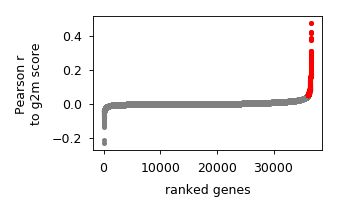

In [18]:
# select threshold:
ccts = 0.05
corrmask = coefs>ccts
print(corrmask.sum())

# add to the list of genes to avoid:


# show in a plot
a,fig,gs=rz.startfig(5,3)
y = np.sort(coefs)
x = np.arange(len(y))
yred = y[y>ccts]
xred = x[y>ccts]

a.scatter(x,y,c='0.5',s=2)
a.scatter(xred,yred,c='r',s=2)

a.set_ylabel('Pearson r\nto g2m score')
a.set_xlabel('ranked genes');

### Further gene filtering on abundance, variability, and correlation

In [19]:
# genes to exclude:
exclude_gene_names = []
for j in toavoid:
    exclude_gene_names.append([i for i in adata.var_names if i.startswith(j)])
    
    
# add the correlated genes 
exclude_gene_names.append(list(adata.var_names[corrmask]))
exclude_gene_names.append(cell_cycle_genes)
    
exclude_gene_names = rz.flatten_list_of_lists(exclude_gene_names)

pdict['gene_names_excluded'] = exclude_gene_names
pdict['cell_cycle_genes'] = cell_cycle_genes
pdict['genes_correlated_to_g2m'] = list(adata.var_names[corrmask])
print('%d genes excluded based on name or correlation to cell cycle'%len(exclude_gene_names))


##########################################################################################

# filter on abundance:
pdict['abundant_gene_mask'] = srz.filter_abund_genes(
                                                     E[pdict['base_ix'],:],
                                                     pdict['min_counts'],
                                                     pdict['min_cells']
                                                    )

744 genes excluded based on name or correlation to cell cycle
11414 genes passing abundance filter


In [20]:
# combine gene filters so far
undesired = list(pdict['gene_names_excluded'])+\
            list(cdata.var_names[~pdict['abundant_gene_mask']])

print(len(undesired))
undesired = list(set(undesired))
print(len(undesired))

# boolean mask
combmask = ~np.in1d(cdata.var_names,undesired)
print(combmask.sum(),'surviving genes so far')

25931
25815
10789 surviving genes so far


In [21]:
# calculate v score (Klein et al., 2015, see equation S4 and S13) for all non-zero genes
isexpr = np.array(E.sum(axis=0))[0]>0
print('%d genes with non-zero expression'%sum(isexpr))
pdict['v_score_dict'] = srz.vscores(E[:,isexpr])

24878 genes with non-zero expression


In [22]:
# get genes above mode, i.e. any that can be considered variable
gabmod = cdata.var_names[isexpr][pdict['v_score_dict']['var_gene_mask']]
print(len(gabmod),'variable genes')

11851 variable genes


### Choose a fixed number of top variable genes

In [23]:
# Choose a fixed number of top variable genes
nvar = 2000
topvar = cdata.var_names[combmask&isexpr]\
        [np.argsort(pdict['v_score_dict']['v_scores'][combmask[isexpr]])][-nvar:]

In [24]:
# update combmask:
combmask = np.in1d(cdata.var_names,topvar)
print(combmask.sum(),'abundant and variable genes')

2000 abundant and variable genes


In [25]:
# record genes surviving selection
pdict['genes_used'] = cdata.var_names[combmask]
print(len(pdict['genes_used']),'genes surviving all filters')

2000 genes surviving all filters


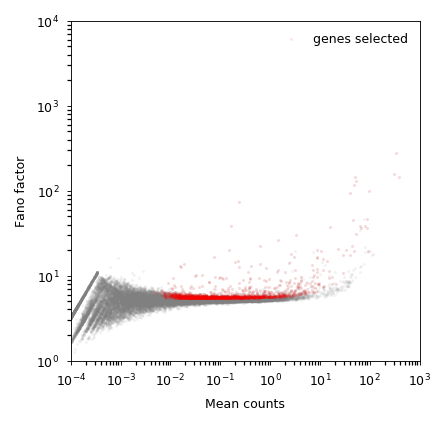

In [26]:
# plot a fano factor vs mean plot with genes used further colored in red
ff = pdict['v_score_dict']['ff_gene']
mu = pdict['v_score_dict']['mu_gene']
finalmask = np.in1d(cdata.var_names,pdict['genes_used'])

# check scatter
s = 2
plt.figure(figsize=(3,3))
plt.scatter(mu,ff,lw=0,color='0.5',alpha=0.1,s=s)

plt.scatter(mu[finalmask[isexpr]],ff[finalmask[isexpr]],
            lw=0,color='r',alpha=0.1,s=s,label='genes selected')

plt.legend()

plt.xscale('log');
plt.yscale('log');
plt.xlim(0.0001,1000)
plt.ylim(1,10000)
plt.xlabel('Mean counts')
plt.ylabel('Fano factor');

### PCA

In [27]:
# leave only genes defined as variable, overwrite
print(cdata.shape)
finalmask = np.in1d(cdata.var_names,pdict['genes_used'])
cdata = cdata[:,finalmask]
print(cdata.shape)

(32415, 36601)
(32415, 2000)


In [28]:
# zscore (note:when applying batch correction this step is a bit more involved)
sc.pp.scale(cdata)
Z = cdata.X

/Users/rapolaszilionis/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [29]:
# find the number of non-random PCs.
# shuffle z-scores, perform PCA, get the first eigenvalue, record the number of
# observed PCs (n_non_trivial) with a eigenvalues higher than the first random eigenvalue.
# repeat 5 times, choose the smallest n_non_trivial
d = srz.find_num_pc(Z,start_pc=500,sparse=False,n=3)

calculating the first 500 observed eigenvalues...
calculating the random eigenvalues for 3 rounds of shuffling...
1 	 89 	 0.41 min.
2 	 86 	 0.71 min.
3 	 89 	 1.03 min.


In [30]:
# record results to log:
pdict['num_pc'] = d['num_pc']
pdict['eigenvectors'] = d['pca'].components_
pdict['eigenvalues'] = d['pca'].explained_variance_

print(d['num_pc'])

86


In [31]:
# transform observed data
# make sure to provide a dense matrix Z

P = pdict['eigenvectors'][:pdict['num_pc'],:].dot(Z.T).T
print(P.shape)

(32415, 86)


### Draw graph

In [32]:
# Place the principle component data into an AnnData object to use scanpynian functions downstream

P = AnnData(P)

# get kNN graph
# ignore the error message: https://github.com/lmcinnes/umap/issues/87
k = pdict['k']
print(k, 'neighbors')
sc.pp.neighbors(P,k,use_rep='X')

# Draw force-directed graph.
# This is just to get an initial version of xy coordinates
# Nodes are further relaxed in interactive SPRING mode.
sc.tl.draw_graph(P, layout='fa',maxiter=1)

10 neighbors
computing neighbors
    finished (0:00:14)
drawing single-cell graph using layout 'fa'
    finished (0:00:02)


### Add relevant adata columns to the AnnData object P

In [33]:
cdata.obs.head()

,barcode,library,total_counts,pct_counts_mito,condition,more_than_1000_total_counts,more_than_1500_total_counts,more_than_2000_total_counts,genes_detected,n_counts
82,AACAGCGAATACCGCA,1_ix2_S1,2560,6.5625,1,True,True,True,947,2560.0
121,AACAGCGACAGAGATG,1_ix2_S1,1383,4.4107,1,True,False,False,595,1383.0
130,AACAGCGACATAGCTG,1_ix2_S1,913,6.68127,1,False,False,False,502,913.0
132,AACAGCGACATCGTCT,1_ix2_S1,3974,2.71766,1,True,True,True,1438,3974.0
174,AACAGCGACGTCTCAT,1_ix2_S1,1988,2.61569,1,True,True,False,827,1988.0


In [34]:
# continuous per-cell metadata
contvars = ['total_counts','pct_counts_mito','genes_detected']

# categorical
catvars = ['library','condition',
          'more_than_1000_total_counts',
          'more_than_1500_total_counts',
          'more_than_2000_total_counts']

In [35]:
# export_spring_plot was complaining about the data format, force the right one
for contvar in contvars:
    P.obs[contvar] = cdata.obs[contvar].astype(float).values
    
for catvar in catvars:
    P.obs[catvar] = cdata.obs[catvar].astype(str).values

computing UMAP
    finished (0:00:16)


... storing 'library' as categorical
... storing 'condition' as categorical
... storing 'more_than_1000_total_counts' as categorical
... storing 'more_than_1500_total_counts' as categorical
... storing 'more_than_2000_total_counts' as categorical


min_dist=0.50,spread=3.00
computing UMAP
    finished (0:00:16)
min_dist=0.50,spread=2.00
computing UMAP
    finished (0:00:16)
min_dist=0.50,spread=1.00
computing UMAP
    finished (0:00:17)
min_dist=0.50,spread=0.50
computing UMAP
    finished (0:00:17)
min_dist=0.10,spread=3.00
computing UMAP
    finished (0:00:15)
min_dist=0.10,spread=2.00
computing UMAP
    finished (0:00:16)
min_dist=0.10,spread=1.00
computing UMAP
    finished (0:00:16)
min_dist=0.10,spread=0.50
computing UMAP
    finished (0:00:16)
min_dist=0.05,spread=3.00
computing UMAP
    finished (0:00:17)
min_dist=0.05,spread=2.00
computing UMAP
    finished (0:00:17)
min_dist=0.05,spread=1.00
computing UMAP
    finished (0:00:17)
min_dist=0.05,spread=0.50
computing UMAP
    finished (0:00:17)
min_dist=0.01,spread=3.00
computing UMAP
    finished (0:00:17)
min_dist=0.01,spread=2.00
computing UMAP
    finished (0:00:17)
min_dist=0.01,spread=1.00
computing UMAP
    finished (0:00:17)
min_dist=0.01,spread=0.50


/Users/rapolaszilionis/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


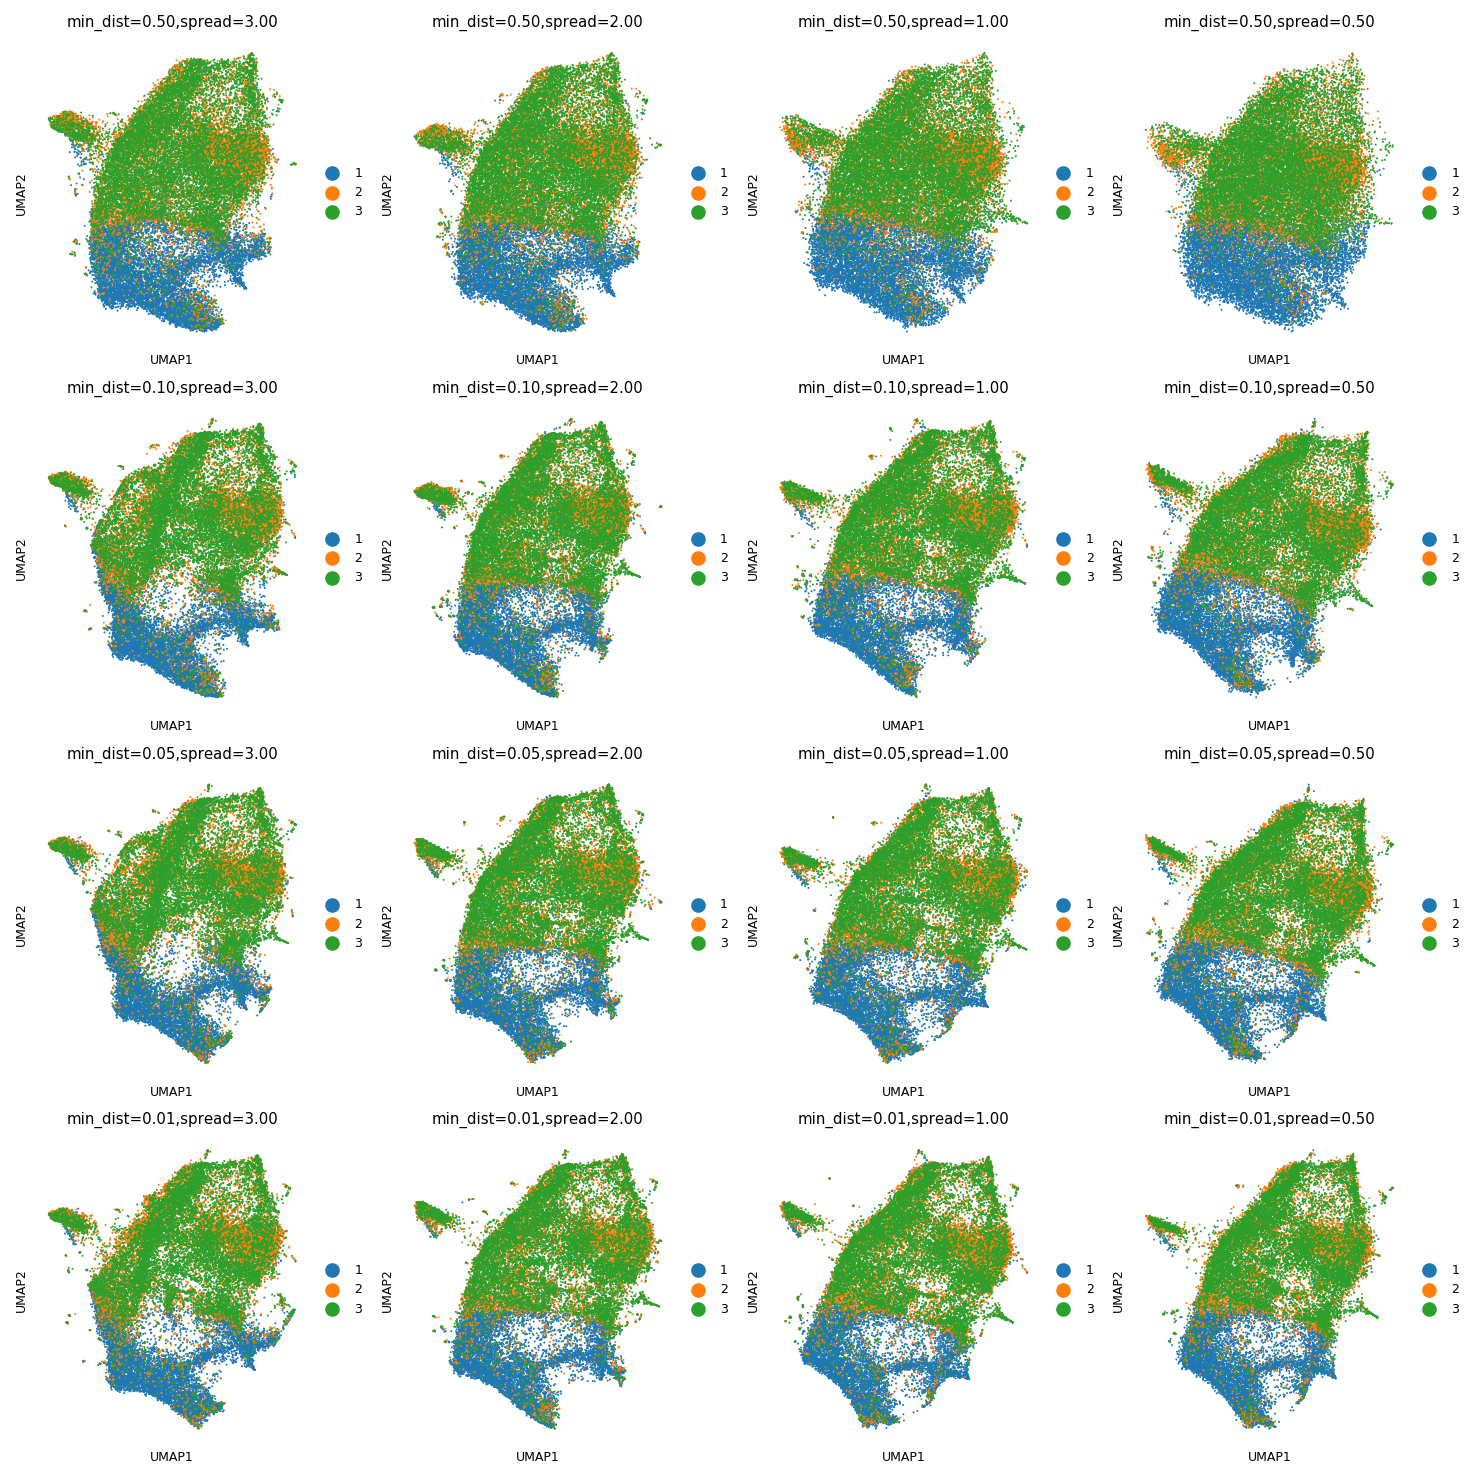

In [36]:
fig,gs=rz.startfig(return_first_ax=False,columns=4,rows=4,h=25,w=25)
for mdist,row in zip([0.5,0.1,0.05,0.01],[0,1,2,3]):
    for sprd,col in zip([3,2,1,0.5],[0,1,2,3]):


        sc.tl.umap(P,min_dist=mdist,spread=sprd)
        a = fig.add_subplot(gs[row,col],frameon=False)
        a.set_xticks([])
        a.set_yticks([])
        sc.pl.umap(P,ax=a,color='condition',show=False)
        tit = "min_dist=%.2f,spread=%.2f"%(mdist,sprd)
        a.set_title(tit)
        print(tit)
        
        fr = pd.DataFrame(P.obsm['X_umap'])*200.
        fr.to_csv('outputs/%s_coordinates_UMAP_%s.txt'%(plot_name,
            tit.replace('=','_').replace(',','_')),header=None)
        
gs.tight_layout(fig)
plt.savefig('outputs/%s_umaps.png'%plot_name)
plt.show()

### Save count data and cell coloring data for interactive exploration using the SPRING tool  

In [37]:
plot_name = pdict['plot_name']
print(plot_name)


srz.export_spring_plot(P,
                       project_dir,
                       plot_name,
                       
                       # specify the normalized expression values
                       # this is solely to calculate where the default saturation
                       # of gene expression is in the interactive explorer
                       E = adata[cell_mask].X.tocsc(), # tocsc() super important here
                       gene_list = adata.var_names.values,
                       cell_groupings=catvars,
                       custom_color_tracks=contvars,
                      )

all_above_900_UMAP_no_cc_2000
Writing subplot to /Users/rapolaszilionis/Google Drive/DG/tmp_for_S3/20210616_RZ_macrophage_fastq_and_counts/quick_analysis_spring_plot/SPRING_dev-master/data//mamito/all_above_900_UMAP_no_cc_2000/


In [38]:
# the function "srz.export_spring_plot" needs to be updated to properly save the cell filter. To do.
# for now I use a hack and save manually using the code in this cell.

subplot_dir = project_dir+'/'+plot_name + '/'
cell_ix = np.arange(len(pdict['cell_mask']))[pdict['cell_mask']]  
np.savetxt(subplot_dir + 'cell_filter.txt', cell_ix, fmt='%i')
np.save(subplot_dir + 'cell_filter.npy', cell_ix)

In [39]:
#save plot parameters
rz.save_stuff(path=project_dir+'/'+plot_name+'/params',stuff=pdict)

In [40]:
# make an html copy of THIS notebook

#moveto = project_dir+'/'+plot_name+'/'
#!jupyter nbconvert all_mito_part2_spring_plot_all_cells_v4_no_cc.ipynb
#!mv all_mito_part2_spring_plot_all_cells_v4_no_cc.html "$moveto"

[NbConvertApp] Converting notebook all_mito_part2_spring_plot_all_cells_v4_no_cc.ipynb to html
[NbConvertApp] Writing 390106 bytes to all_mito_part2_spring_plot_all_cells_v4_no_cc.html


In [37]:
!open "$moveto"

### Choose favorite UMAP and manually copy coordinates to spring directory

In [70]:
# I choose
# all_above_900_UMAP_no_cc_2000_coordinates_UMAP_min_dist_0.10_spread_1.00.txt

In [71]:
!open outputs/

## Leiden clusters of the weighted graph

In [41]:
for res in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.5,3]:
    thekey="leiden_%.1f"%res
    print(thekey)
    sc.tl.leiden(P,resolution=res,key_added=thekey)

leiden_0.3
running Leiden clustering
    finished (0:00:06)
leiden_0.4
running Leiden clustering
    finished (0:00:07)
leiden_0.5
running Leiden clustering
    finished (0:00:09)
leiden_0.6
running Leiden clustering
    finished (0:00:08)
leiden_0.7
running Leiden clustering
    finished (0:00:08)
leiden_0.8
running Leiden clustering
    finished (0:00:07)
leiden_0.9
running Leiden clustering
    finished (0:00:13)
leiden_1.0
running Leiden clustering
    finished (0:00:14)
leiden_1.5
running Leiden clustering
    finished (0:00:16)
leiden_2.0
running Leiden clustering
    finished (0:00:11)
leiden_2.5
running Leiden clustering
    finished (0:00:07)
leiden_3.0
running Leiden clustering
    finished (0:00:21)


In [42]:
labellist = [i for i in P.obs.columns if i.startswith('leiden_')]
cg = P.obs[labellist].to_dict(orient="list")

In [43]:
# load current color dictionary
cg0 = srz.read_cell_groupings(project_dir+'/'+plot_name+'/categorical_coloring_data.json')

# color dictionary of dictionaries
cdd = {key:value['label_colors'] for key,value in cg0.items()}

In [44]:
# append categorical colortrack
srz.append_cell_groupings(project_dir+'/'+plot_name,cg,colordd=cdd)

In [45]:
# write the entire adata.object
start = time.time()
fname1 = 'backups/PCA_transformed_with_KNN_leiden_%dx%d_%s.h5ad'%(P.shape[0],P.shape[1],rz.now())
print(fname1)
P.write(fname1)
print(time.time()-start)

backups/PCA_transformed_with_KNN_leiden_32415x86_210828_16h04.h5ad
0.24745917320251465
